In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import confusion_matrix

#IMPORT 5 CLASSIFIERS ALGORITHMS FROM SKLEARN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline

#import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(10,7)})

#INSTANTIATE 5 ALGORITHMS/ESTIMATORS
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
adc = AdaBoostClassifier()
knc = KNeighborsClassifier()
mnb = MultinomialNB()

In [2]:
df = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df2 = pd.read_csv(r'C:\thesis\datasets_clf.csv')
df

student_id   age sex course  yr_level socioeconomic_stat fam_support  \
0    2021-01592  19.0   F     CD         2                low         yes   
1    2021-02910  19.0   F     CD         2       lower middle         yes   
2    2021-02862  19.0   F     CD         2                low         yes   
3    2021-02890  19.0   F     CD         2       lower middle         yes   
4    2020-04136  20.0   F     CD         2                low         yes   
..          ...   ...  ..    ...       ...                ...         ...   
352  2021-00476  21.0   F     SW         2       lower middle         yes   
353  2021-01868  20.0   F     SW         2                low         yes   
354  2021-01891  19.0   F     SW         2                low         yes   
355  2021-01897  19.0   F     SW         2                low         yes   
356  2021-02472  21.0   M     SW         2                low          no   

    working_stud scholar personality_type  ...       wifi prepaid-wifi  \
0             no     yes             ISTJ  ...      never       always   
1             no      no             ESFJ  ...  sometimes    sometimes   
2             no      no             ENTP  ...     always        never   
3            yes      no             ESFJ  ...     always    sometimes   
4             no      no             ISFJ  ...  sometimes        never   
..           ...     ...              ...  ...        ...          ...   
352           no      no             ISFP  ...     always    sometimes   
353          yes      no             ISFP  ...     always        never   
354           no      no             ENFJ  ...     always        never   
355           no      no             ISFP  ...     always       always   
356           no      no             ESFP  ...      never    sometimes   

    cellular_data    hotspot vhigh_speed high_speed moderate_speed  \
0          always  sometimes      always     always      sometimes   
1       sometimes  sometimes   sometimes  sometimes      sometimes   
2          always  sometimes   sometimes     always      sometimes   
3           never  sometimes   sometimes  sometimes         always   
4       sometimes  sometimes       never  sometimes      sometimes   
..            ...        ...         ...        ...            ...   
352         never      never   Sometimes  sometimes      sometimes   
353     sometimes  sometimes   Sometimes     always      sometimes   
354        always      never      always  sometimes      sometimes   
355     sometimes      never      always     always      sometimes   
356        always  sometimes   sometimes  sometimes      sometimes   

    light_speed     GPA          gpa_range  
0     sometimes  1.5588           Superior  
1     sometimes  1.3824           Superior  
2     sometimes  1.5882           Superior  
3     sometimes  1.5000           Superior  
4        always  1.4347           Superior  
..          ...     ...                ...  
352       never  1.9559  Very-Satisfactory  
353       never  1.5294           Superior  
354   sometimes  1.7647  Very-Satisfactory  
355       never  1.4853           Superior  
356   sometimes  1.4265           Superior  

[357 rows x 51 columns]

-------

# EXPLORE DATAFRAME

In [3]:
#Dimension of the raw dataframe
print("Dimension of the data raw dataframe Rows by Columns, ", df.shape)

Dimension of the data raw dataframe Rows by Columns,  (357, 51)


In [4]:
#check Dataframe with null values
df2.isna().sum()

student_id             0
age                   11
sex                    6
course                 0
yr_level               0
socioeconomic_stat     0
fam_support            0
working_stud           0
scholar                0
personality_type       0
TM1                    0
TM2                    0
TM3                    0
TM4                    0
TM5                    0
TM6                    0
TM7                    0
CAP1                   0
CAP2                   0
CAP3                   1
CAP4                   0
GSS1                   0
GSS2                   0
GSS3                   0
GSS4                   0
GSS5                   0
GSS6                   0
GSS7                   0
EP1                    0
EP2                    0
EP3                    0
EP4                    0
EP5                    0
EP6                    0
NT1                    0
NT2                    0
NT3                    0
desktop                0
laptop                 0
mobile_phone           0


In [5]:
df.describe()

age    yr_level         GPA
count  346.000000  357.000000  357.000000
mean    20.462428    2.851541    1.918353
std      1.520880    0.740353    0.446958
min     10.000000    2.000000    1.197900
25%     20.000000    2.000000    1.586500
50%     20.000000    3.000000    1.855800
75%     21.000000    3.000000    2.148700
max     29.000000    4.000000    4.368400

It has seen that the minimum age for the age is an outlier and that is age 10. and thre are null values inssid ethe column age and the rest columns are good. 

-----

# DATA CLEANING

In [6]:
#Check Sex consistency
print("Sex Attributes :" ,df2.sex.unique())
print("""  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.""""" )

#checking missing value for sex
print("\nNumber of missing values of Sex","[" ,df2.sex.isna().sum(), "]")

#Replace Sex value with a precise value 'S' and 'M' and Fill values
df["sex"].replace("M ", "M", inplace = True)
df["sex"].replace("F ", "F", inplace = True)
df["sex"].fillna(method="ffill", inplace=True)

#Check uniqueness of Sex
print("\nUpdated Attributes inside Sex : " ,df["sex"].unique())

print("\nNumber of missing values of Sex","[" ,df.sex.isna().sum(), "]")

#Values of each attribute for Sex
valueCounts_MaleFemale = df.sex.value_counts()
valueCounts_MaleFemale

Sex Attributes : ['F' 'M' nan 'M ' 'F ']
  Justification  There are 4 attribute exsting inside Sex. We should replace the values with 
                             precise input for consistency.

Number of missing values of Sex [ 6 ]

Updated Attributes inside Sex :  ['F' 'M']

Number of missing values of Sex [ 0 ]


F    198
M    159
Name: sex, dtype: int64

In [7]:
#Check uniqueness for age
Age_Unique = df.age.sort_values().unique()
Age_Unique

array([10., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       nan])

In [8]:
#Check for missing values for age
AgeMissing = df2["age"].isna().sum()
print("\nNumber of missing value of age : ", AgeMissing, " missing")

#Filling missing values for age with mean.
df.age.fillna(df["age"].mean(), inplace = True)

#Check for missing values for age
print("\nNumber of missing value of age : ", df["age"].isna().sum(), " missing")


Number of missing value of age :  11  missing

Number of missing value of age :  0  missing


In [9]:
#fill missing values for CAP3
df["CAP3"].fillna(method="ffill", inplace = True)
print("\nNumber of missing value of CAP3 : ", df["CAP3"].isna().sum())


Number of missing value of CAP3 :  0


In [10]:
print("Dataframe has no missing value")
df.isna().sum()

Dataframe has no missing value


student_id            0
age                   0
sex                   0
course                0
yr_level              0
socioeconomic_stat    0
fam_support           0
working_stud          0
scholar               0
personality_type      0
TM1                   0
TM2                   0
TM3                   0
TM4                   0
TM5                   0
TM6                   0
TM7                   0
CAP1                  0
CAP2                  0
CAP3                  0
CAP4                  0
GSS1                  0
GSS2                  0
GSS3                  0
GSS4                  0
GSS5                  0
GSS6                  0
GSS7                  0
EP1                   0
EP2                   0
EP3                   0
EP4                   0
EP5                   0
EP6                   0
NT1                   0
NT2                   0
NT3                   0
desktop               0
laptop                0
mobile_phone          0
tablet                0
wifi            

-----

# RECONSTRUCTING VALUES INSIDE COLUMNS

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          357 non-null    object 
 1   age                 357 non-null    float64
 2   sex                 357 non-null    object 
 3   course              357 non-null    object 
 4   yr_level            357 non-null    int64  
 5   socioeconomic_stat  357 non-null    object 
 6   fam_support         357 non-null    object 
 7   working_stud        357 non-null    object 
 8   scholar             357 non-null    object 
 9   personality_type    357 non-null    object 
 10  TM1                 357 non-null    object 
 11  TM2                 357 non-null    object 
 12  TM3                 357 non-null    object 
 13  TM4                 357 non-null    object 
 14  TM5                 357 non-null    object 
 15  TM6                 357 non-null    object 
 16  TM7     

In [12]:
#PRINT UNIQUENESS OF ALL FEATURES EXCEPT STUDENT
print(" Unique of age : ", df2["age"].unique(), "\n")
print(" Unique of sex : ", df2["sex"].unique(), "\n")
print(" Unique of course : ", df2["course"].unique(), "\n")
print(" Unique of yr_level: ", df2["yr_level"].unique(), "\n")
print(" Unique of socioeconomic_stat : ", df2["socioeconomic_stat"].unique(), "\n")
print(" Unique of fam_support : ", df2["fam_support"].unique(), "\n")
print(" Unique of working_stud : ", df2["working_stud"].unique(), "\n")
print(" Unique of scholar : ", df2["scholar"].unique(), "\n")
print(" Unique of personality_type : ", df2["personality_type"].unique(), "\n")
print(" Unique of TM1 : ", df2["TM1"].unique(), "\n")
print(" Unique of TM2 : ", df2["TM2"].unique(), "\n")
print(" Unique of TM3 : ", df2["TM3"].unique(), "\n")
print(" Unique of TM4 : ", df2["TM4"].unique(), "\n")
print(" Unique of TM5 : ", df2["TM5"].unique(), "\n")
print(" Unique of TM6 : ", df2["TM6"].unique(), "\n")
print(" Unique of TM7 : ", df2["TM7"].unique(), "\n")
print(" Unique of CAP1 : ", df2["CAP1"].unique(), "\n")
print(" Unique of CAP2 : ", df2["CAP2"].unique(), "\n")
print(" Unique of CAP3 : ", df2["CAP3"].unique(), "\n")
print(" Unique of CAP4 : ", df2["CAP4"].unique(), "\n")
print(" Unique of GSS1 : ", df2["GSS1"].unique(), "\n")
print(" Unique of GSS2 : ", df2["GSS2"].unique(), "\n")
print(" Unique of GSS3 : ", df2["GSS3"].unique(), "\n")
print(" Unique of GSS4 : ", df2["GSS4"].unique(), "\n")
print(" Unique of GSS5 : ", df2["GSS5"].unique(), "\n")
print(" Unique of GSS6 : ", df2["GSS6"].unique(), "\n")
print(" Unique of GSS7 : ", df2["GSS7"].unique(), "\n")
print(" Unique of EP1 : ", df2["EP1"].unique(), "\n")
print(" Unique of EP2 : ", df2["EP2"].unique(), "\n")
print(" Unique of EP3 : ", df2["EP3"].unique(), "\n")
print(" Unique of EP4 : ", df2["EP4"].unique(), "\n")
print(" Unique of EP5 : ", df2["EP5"].unique(), "\n")
print(" Unique of EP6 : ", df2["EP6"].unique(), "\n")
print(" Unique of NT1 : ", df2["NT1"].unique(), "\n")
print(" Unique of NT2 : ", df2["NT2"].unique(), "\n")
print(" Unique of NT3 : ", df2["NT3"].unique(), "\n")
print(" Unique of desktop : ", df2["desktop"].unique(), "\n")
print(" Unique of laptop : ", df2["laptop"].unique(), "\n")
print(" Unique of mobile_phone : ", df2["mobile_phone"].unique(), "\n")
print(" Unique of tablet : ", df2["tablet"].unique(), "\n")
print(" Unique of wifi : ", df2["wifi"].unique(), "\n")
print(" Unique of prepaid-wifi : ", df2["prepaid-wifi"].unique(), "\n")
print(" Unique of cellular_data : ", df2["cellular_data"].unique(), "\n")
print(" Unique of hotspot : ", df2["hotspot"].unique(), "\n")
print(" Unique of vhigh_speed : ", df2["vhigh_speed"].unique(), "\n")
print(" Unique of high_speed : ", df2["high_speed"].unique(), "\n")
print(" Unique of moderate_speed : ", df2["moderate_speed"].unique(), "\n")
print(" Unique of light_speed : ", df2["light_speed"].unique(), "\n")

 Unique of age :  [19. 20. 21. 25. 18. nan 22. 27. 24. 23. 29. 28. 10. 26.] 

 Unique of sex :  ['F' 'M' nan 'M ' 'F '] 

 Unique of course :  ['CD' 'IT' 'CS' 'SW'] 

 Unique of yr_level:  [2 3 4] 

 Unique of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'low ' 'Upper but not rich'
 'rich' 'lower'] 

 Unique of fam_support :  ['yes' 'no'] 

 Unique of working_stud :  ['no' 'yes'] 

 Unique of scholar :  ['yes' 'no'] 

 Unique of personality_type :  ['ISTJ' 'ESFJ' 'ENTP' 'ISFJ' 'ENFJ' 'INFJ' 'ISFP' 'INTJ' 'ENTJ' 'ESTP'
 'INFP' 'ESFP' 'ESTJ' 'ENFP' 'ISTP' 'INTP'] 

 Unique of TM1 :  ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom'
 'sometiems'] 

 Unique of TM2 :  ['sometimes' 'never' 'always'] 

 Unique of TM3 :  ['sometimes' 'always' 'never'] 

 Unique of TM4 :  ['always' 'sometimes' 'never'] 

 Unique of TM5 :  ['always' 'sometimes' 'never'] 

 Unique of TM6 :  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes'] 

 Unique of TM7 

       JUSTIFICATION :
           Columns that REQUIRES replacing unwanted values;
              TM1 -> ['always' 'sometimes' 'never' 'sometime' 'Sometimes' 'sometimesom' 'sometiems'] 
              TM6 ->  ['always' 'sometimes' 'never' 'sometime' 'sometimess' 'someyimes']
              CAP1 -> ['always' 'sometimes' 'Always' 'never'] 
              CAP2 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimesnever' 's'] 
              GSS5 -> ['always' 'sometimes' 'Sometimes' 'never' 'sometimes ' 'sometime'] 
              tablet -> ['never' 'sometimes' 'an' 'always']
              prepaid-wifi -> ['always' 'sometimes' 'never' 'Sometimes'] 
              vhigh_speed -> ['always' 'sometimes' 'never' 'Sometimes'] 
              high_speed -> ['always' 'sometimes' 'never' 'high'] 
              moderate_speed -> ['sometimes' 'always' 'never' 'moderate'] 
                
       **THE FF. INPUTS WAS NOT CONSISTENT**    

#### Replacing precise value inside columns stated above

In [13]:
#Replacing unwanted values
df.replace({
            'socioeconomic_stat' : {'low ':'low', 'lower':'low'},
            'TM1' : {'sometime':'sometimes',
                     'Sometimes':'sometimes',
                     'sometimesom':'sometimes',
                     'sometiems':'sometimes'
                    },
            'TM6' : {'sometime':'sometimes',
                     'sometimess':'sometimes',
                     'someyimes':'sometimes'
                    },
            'CAP1' : {'Always':'always'},
            'CAP2' : {'Sometimes':'sometimes',
                      'sometimesnever':'sometimes',
                      's':'sometimes'
                     },
            'GSS5' : {'Sometimes':'sometimes',
                      'sometimes ':'sometimes', 
                      'sometime':'sometimes'},
            'tablet' : {'an':'always'},
            'prepaid-wifi' : {'Sometimes':'sometimes'},
            'vhigh_speed' : {'Sometimes':'sometimes'},
            'high_speed' : {'high':'always'},
            'moderate_speed' : {'moderate':'sometimes'}
           }, inplace=True)

In [14]:
df.replace({'age' : {10 : df['age'].mean()}}, inplace=True)

#### Check replaced value 

In [15]:
print("Updated Uniqueness of socioeconomic_stat : ", df["socioeconomic_stat"].unique(), "\n")
print("Updated Uniqueness of TM1 : ", df["TM1"].unique(),"\n")
print("Updated Uniqueness of TM6 : ", df["TM6"].unique(),"\n")
print("Updated Uniqueness of CAP1 : ", df["CAP1"].unique(),"\n")
print("Updated Uniqueness of CAP2 : ", df["CAP2"].unique(),"\n")
print("Updated Uniqueness of GSS5 : ", df["GSS5"].unique(),"\n")
print("Updated Uniqueness of prepaid-wifi : ", df["prepaid-wifi"].unique(),"\n")
print("Updated Uniqueness of vhigh_speed : ", df["vhigh_speed"].unique(),"\n")
print("Updated Uniqueness of high_speed : ", df["high_speed"].unique(),"\n")
print("Updated Uniqueness of moderate_speed : ", df["moderate_speed"].unique(),"\n")

Updated Uniqueness of socioeconomic_stat :  ['low' 'lower middle' 'middle' 'upper middle' 'Upper but not rich' 'rich'] 

Updated Uniqueness of TM1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of TM6 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP1 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of CAP2 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of GSS5 :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of prepaid-wifi :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of vhigh_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of high_speed :  ['always' 'sometimes' 'never'] 

Updated Uniqueness of moderate_speed :  ['sometimes' 'always' 'never'] 



We have now succesfully replaced unwated value inside necessary columns

----

In [16]:
df

student_id   age sex course  yr_level socioeconomic_stat fam_support  \
0    2021-01592  19.0   F     CD         2                low         yes   
1    2021-02910  19.0   F     CD         2       lower middle         yes   
2    2021-02862  19.0   F     CD         2                low         yes   
3    2021-02890  19.0   F     CD         2       lower middle         yes   
4    2020-04136  20.0   F     CD         2                low         yes   
..          ...   ...  ..    ...       ...                ...         ...   
352  2021-00476  21.0   F     SW         2       lower middle         yes   
353  2021-01868  20.0   F     SW         2                low         yes   
354  2021-01891  19.0   F     SW         2                low         yes   
355  2021-01897  19.0   F     SW         2                low         yes   
356  2021-02472  21.0   M     SW         2                low          no   

    working_stud scholar personality_type  ...       wifi prepaid-wifi  \
0             no     yes             ISTJ  ...      never       always   
1             no      no             ESFJ  ...  sometimes    sometimes   
2             no      no             ENTP  ...     always        never   
3            yes      no             ESFJ  ...     always    sometimes   
4             no      no             ISFJ  ...  sometimes        never   
..           ...     ...              ...  ...        ...          ...   
352           no      no             ISFP  ...     always    sometimes   
353          yes      no             ISFP  ...     always        never   
354           no      no             ENFJ  ...     always        never   
355           no      no             ISFP  ...     always       always   
356           no      no             ESFP  ...      never    sometimes   

    cellular_data    hotspot vhigh_speed high_speed moderate_speed  \
0          always  sometimes      always     always      sometimes   
1       sometimes  sometimes   sometimes  sometimes      sometimes   
2          always  sometimes   sometimes     always      sometimes   
3           never  sometimes   sometimes  sometimes         always   
4       sometimes  sometimes       never  sometimes      sometimes   
..            ...        ...         ...        ...            ...   
352         never      never   sometimes  sometimes      sometimes   
353     sometimes  sometimes   sometimes     always      sometimes   
354        always      never      always  sometimes      sometimes   
355     sometimes      never      always     always      sometimes   
356        always  sometimes   sometimes  sometimes      sometimes   

    light_speed     GPA          gpa_range  
0     sometimes  1.5588           Superior  
1     sometimes  1.3824           Superior  
2     sometimes  1.5882           Superior  
3     sometimes  1.5000           Superior  
4        always  1.4347           Superior  
..          ...     ...                ...  
352       never  1.9559  Very-Satisfactory  
353       never  1.5294           Superior  
354   sometimes  1.7647  Very-Satisfactory  
355       never  1.4853           Superior  
356   sometimes  1.4265           Superior  

[357 rows x 51 columns]

In [17]:
# creating excel writer object
writer = pd.ExcelWriter('clean thesis dataset.xlsx')

# write dataframe to excel
df.to_excel(writer)
 
# save the excel
writer.save()
df.to_excel(r"C:\thesis\clean thesis dataset.xlsx", sheet_name='Sheet_name_1')
print("DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.")

DataFrame is exported successfully to 'converted-to-excel.xlsx' Excel File.


In [18]:
import random
#Randomly select 15 data in dataset for future validation
dataValidation = df.sample(n=15, random_state=42, axis='index')

writerValidation = pd.ExcelWriter('EXTRACT DATA FOR DATA VALIDATION.xlsx')
dataValidation.to_excel(writer)

writer.save()
dataValidation.to_excel(r"C:\thesis\EXTRACT DATA FOR DATA VALIDATION.xlsx", sheet_name='Sheet_name_1')
print("DataFrame is exported successfully to 'EXTRACT DATA FOR DATA VALIDATION.xlsx' Excel File.")

DataFrame is exported successfully to 'EXTRACT DATA FOR DATA VALIDATION.xlsx' Excel File.


In [19]:
temp_df = df
temp_dataValidation = dataValidation

#Dataframe without data from validation 
df = temp_df[~temp_df['student_id'].isin(temp_dataValidation['student_id'])]

print ("Dimension of cleaned Dataset",df.shape)
print ("Dimension of after extracting",df.shape)

Dimension of cleaned Dataset (342, 51)
Dimension of after extracting (342, 51)


----

In [20]:
df.shape

(342, 51)

# VISUALIZATION AND INTERPRETATION

Text(0, 0.5, 'Count')

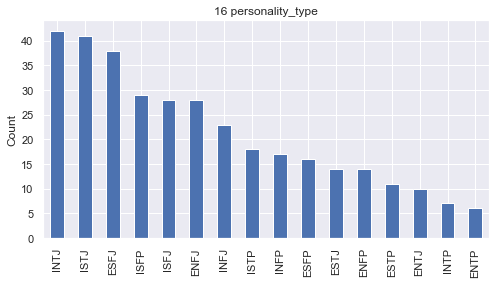

In [21]:
#count 'sex' column ing pie chart
df["personality_type"].value_counts()[:].plot(kind='bar', title='16 personality_type', figsize=(8,4)).set_ylabel("Count")

Most of the students for irregardless of program that they are in, the ISTJ type of personality garnered the most number, followed by the INTJ students.

Text(0.5, 0, 'Count')

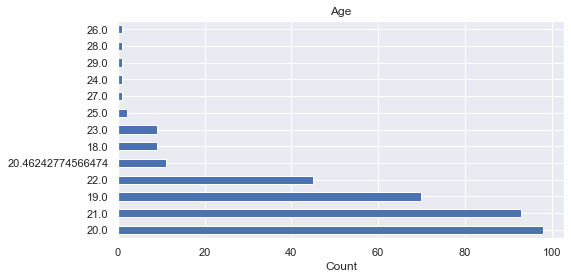

In [22]:
#count 'sex' column ing pie chart
df["age"].value_counts()[:].plot(kind='barh', title='Age', figsize=(8,4)).set_xlabel("Count")

In [23]:
df["age"].describe()

count    342.000000
mean      20.500254
std        1.404606
min       18.000000
25%       20.000000
50%       20.000000
75%       21.000000
max       29.000000
Name: age, dtype: float64

Most of the participants in the study are 20 years old, specifically 19-21-22 years old.

In [24]:
#Count of each sex with family_support
import plotly.express as px

PersonalityPopu = df.groupby('scholar')[["fam_support"]].value_counts()
#PersonalityPopu.plot(kind='pie', colormap='jet')

#names = ["FEMALE, Yes", "FEMALE, No", "MALE, Yes", "MALE, No"]
fig = px.pie(df, values=PersonalityPopu, title="COUNT MALE & FEMALE WITH FAMILY")
fig.show()

96.36% of the sample population are reliant on their family support. However, 3.64% are "not" supported by their family, they provide their own.

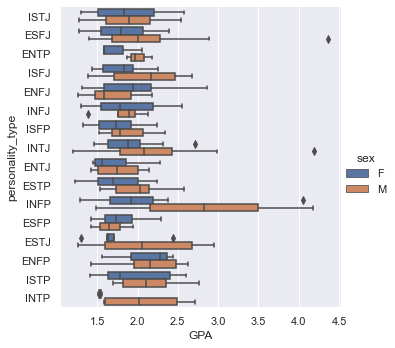

In [25]:
sns.catplot(
    data=df, x="GPA", y="personality_type", hue="sex",
    kind="box", dodge=True,
)

Male students tends to get lower GPA compare to female. 

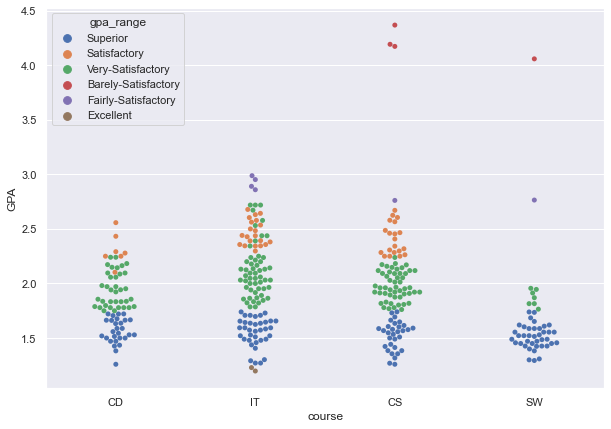

In [26]:
ax = sns.swarmplot(data=df, x="course", y="GPA", hue="gpa_range")

### PLOT TIME MANAGEMENT FOR PERSONALITY TYPE

In [27]:
#create dataframe for demographics
newDEMOinfo = df.iloc[:, [0,1,2,3,4,5,9]]

#create dummy to all tri-features
timeManagement_TM = pd.get_dummies(df.iloc[:,10:17])
classAttendancePartcipation_CAP = pd.get_dummies(df.iloc[:,17:21])

#tri-dataframes
DEMOandTM_DF = pd.concat([newDEMOinfo, timeManagement_TM], axis=1)
DEMOandCAP_DF = pd.concat([newDEMOinfo, classAttendancePartcipation_CAP], axis=1)

In [28]:
#create pivo_tabel for each tri-features for plotting
pivot_tm1_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM1_always", "TM1_sometimes","TM1_never"] , index="personality_type", aggfunc='sum')

pivot_tm2_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM2_always", "TM2_sometimes","TM2_never"] , index="personality_type", aggfunc='sum')

pivot_tm3_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM3_always", "TM3_sometimes","TM3_never"] , index="personality_type", aggfunc='sum')

pivot_tm4_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM4_always", "TM4_sometimes","TM4_never"] , index="personality_type", aggfunc='sum')

pivot_tm5_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM5_always", "TM5_sometimes","TM5_never"] , index="personality_type", aggfunc='sum')

pivot_tm6_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM6_always", "TM6_sometimes","TM6_never"] , index="personality_type", aggfunc='sum')

pivot_tm7_freq = pd.pivot_table(
    DEMOandTM_DF, values=["TM7_always", "TM7_sometimes","TM7_never"] , index="personality_type", aggfunc='sum')

Text(0.5, 1.0, 'Statement [TM1] : I have a study schedule with times set aside to study each subject')

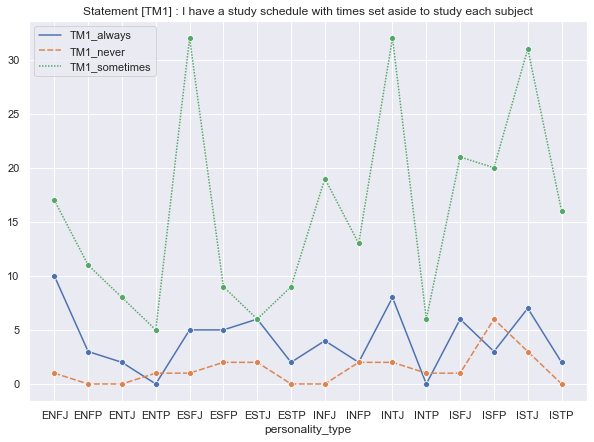

In [29]:
sns.lineplot(data=pivot_tm1_freq,
             marker="o").set_title("Statement [TM1] : I have a study schedule with times set aside to study each subject")

INTERPRETATION:
       
Most dominant personality type that "ALWAYS" scheduled their study time to settle each subjects are ENFJ, INTJ and ISTJ. As opposed to personality type who 'NEVER' clear up a time to study their respective subjects is ISFP. ESFJ, and as well  as, INTJ and ISTJ personality "SOMETIMES" had a time to to settle things. Most of the personality type has answered "SOMETIMES".Hence, students regardless of personality type has a hard time to schedule study time perhaps due to other factors.

Text(0.5, 1.0, 'Statement [TM2] : I use my free time between classes for reading or reviewing')

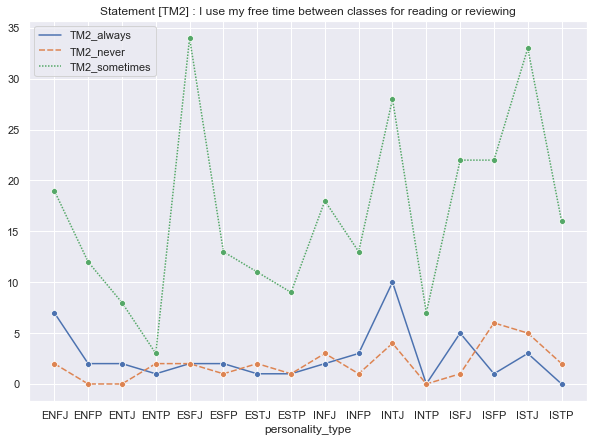

In [30]:
sns.lineplot(data=pivot_tm2_freq,
             marker="o").set_title("Statement [TM2] : I use my free time between classes for reading or reviewing")

 INTERPRETATION: 
      
All personality type are in below average in term of answering "ALWAYS". However, personality types such as ESFJ, INTJ, ISFJ, ISFP and ISTJ. Tends to use their free time for reveiwing and reading. 

Text(0.5, 1.0, 'Statement [TM3] : I balance my study time with recreation and leisure time')

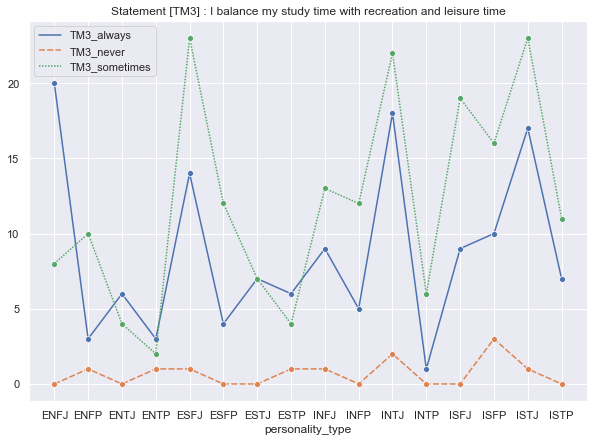

In [31]:
sns.lineplot(data=pivot_tm3_freq,
             marker="o").set_title("Statement [TM3] : I balance my study time with recreation and leisure time")

INTERPRETATION: 

ENFJ personality have a higher tendecy of balacning their academic matter and recreational activity. Additionally, ESFJ students are sometimes inclined to it along with INTJ, ESFJ, ISFJ, ISTJ.

Text(0.5, 1.0, "Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

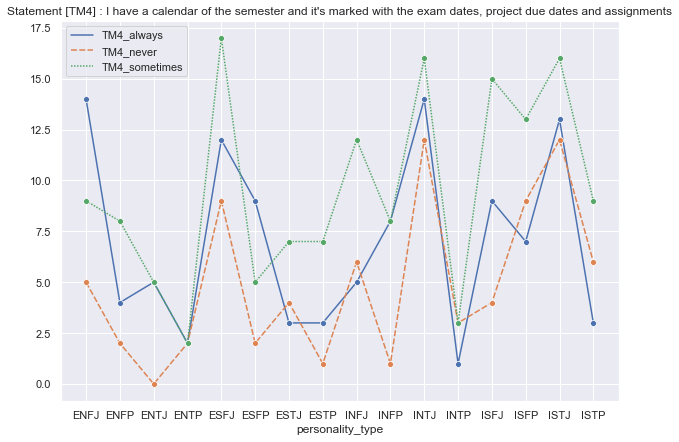

In [32]:
sns.lineplot(data=pivot_tm4_freq, 
             marker="o").set_title("Statement [TM4] : I have a calendar of the semester and it's marked with the exam dates, project due dates and assignments")

INTERPRETATION: 

Most of the personality types settled their calendar dates and marked their academic tasks. however, given the number sample for ENTP they have equal number of frequency that corresponds with the statement. Due to low number of 'always' for INTP it can be ragarded that they dont have the time to mark dates of any types of academic activity.

Text(0.5, 1.0, 'Statement [TM5] : I keep weekly schedule of classes and activities')

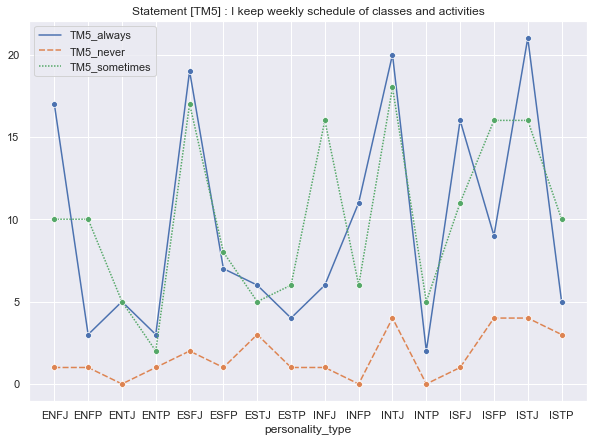

In [33]:
sns.lineplot(data=pivot_tm5_freq,
             marker="o").set_title("Statement [TM5] : I keep weekly schedule of classes and activities")

INTERPRETATION:
        
All personality types are having a weekly schedule to keep track their day-to-day classes and activities. 

Text(0.5, 1.0, 'Statement [TM6] : I use daily to do lists')

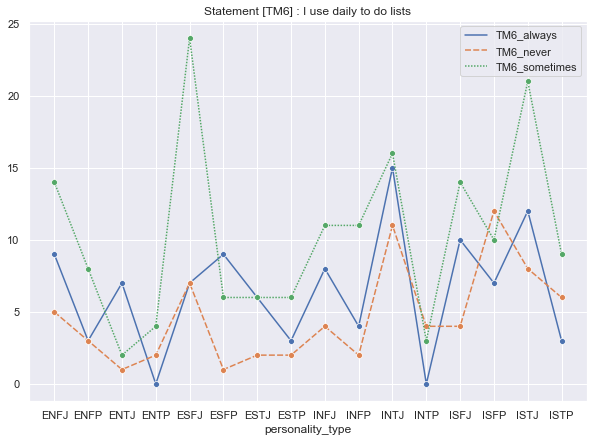

In [34]:
sns.lineplot(data=pivot_tm6_freq,
             marker="o").set_title("Statement [TM6] : I use daily to do lists")

INTERPRETATION:
        
Most of the ISFP personality type's students don't use to do list. On the other hand, majority of ENTJ had a to do list, and among the personality type it is the only type that excedes number in terms of always, regardless of its sample popualtion

Text(0.5, 1.0, 'Statement [TM7] : I study on the weekends')

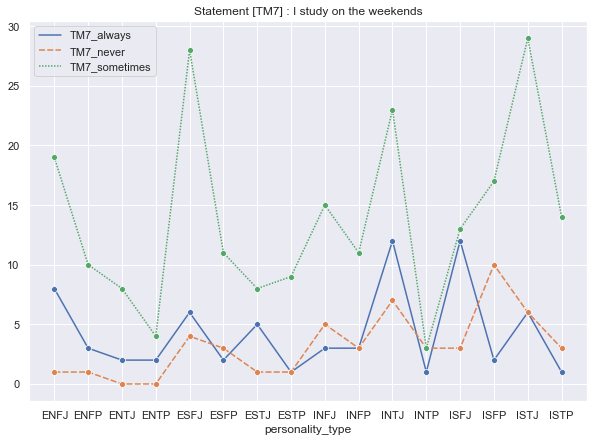

In [35]:
sns.lineplot(data=pivot_tm7_freq, 
             marker="o").set_title("Statement [TM7] : I study on the weekends")

INTERPRETATION
        
Regardless of persoanlity type students 'sometimes' studies on the weekends. ESFP, INFJ, ISFP and ISTP had a most     frequency of 'never' and being raise as the 2nd most number in respect of their population. In contrary, ISFJ type has a great number of always in terms of all types. stating that these type of personality had an effort of studying at the end of the weekends. 

-----

# DATA TRANSFORMATION

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 356
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          342 non-null    object 
 1   age                 342 non-null    float64
 2   sex                 342 non-null    object 
 3   course              342 non-null    object 
 4   yr_level            342 non-null    int64  
 5   socioeconomic_stat  342 non-null    object 
 6   fam_support         342 non-null    object 
 7   working_stud        342 non-null    object 
 8   scholar             342 non-null    object 
 9   personality_type    342 non-null    object 
 10  TM1                 342 non-null    object 
 11  TM2                 342 non-null    object 
 12  TM3                 342 non-null    object 
 13  TM4                 342 non-null    object 
 14  TM5                 342 non-null    object 
 15  TM6                 342 non-null    object 
 16  TM7     

In [37]:
# encode categoricals into  OrdinalEncoder
from category_encoders import OrdinalEncoder
Select_StudInfo_MBTIFeatures = df.iloc[:, [0,1,2,3,4,5,9]]
maplist = [{'col' : 'socioeconomic_stat', 'mapping' : {'low' : 1 ,'lower middle' : 2 ,'middle' : 3, 'upper middle': 4, 'Upper but not rich' : 5,  'rich' :6}},
           {'col' : 'sex' , 'mapping' : { 'F' : 0 , 'M' : 1}},
           {'col' : 'course' , 'mapping' : { 'CD':1, 'IT':2, 'CS':3 , 'SW':4}},
           {'col' : 'personality_type' , 'mapping' : {'ISTJ':0, 'ESFJ':1, 'ENTP':2, 'ISFJ':3, 'ENFJ':4, 'INFJ':5, 'ISFP':6, 'INTJ':7,
       'ENTJ':8, 'ESTP':9, 'INFP':10, 'ESFP':11, 'ESTJ':12, 'ENFP':13, 'ISTP':14, 'INTP':15}}]
oeStudentInfo = OrdinalEncoder(mapping=maplist)
StudInfo_DF = oeStudentInfo.fit_transform(Select_StudInfo_MBTIFeatures)

In [38]:
# encode di-features with OrdinalEncoder
Select_demographicFeatures = df.iloc[:, [6, 7, 8]]
maplist = [{'col' : 'fam_support', 
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'scholar',
                    'mapping' : {'yes' : 1, 'no' : 0}},
           {'col' : 'working_stud', 
                    'mapping' : {'yes' : 1, 'no' : 0}}]
oeDic = OrdinalEncoder(mapping=maplist)
DiFeatures_DF = oeDic.fit_transform(Select_demographicFeatures)

In [39]:
# encode tri-features with OrdinalEncoder
Select_Tri_ValFeatures = df.iloc[:, 10 : 51]
maplist = [{'col' : 'TM1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'TM7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'CAP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'GSS7', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP4', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP5', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'EP6', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT1', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT2', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'NT3', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'desktop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'laptop', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'mobile_phone', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'tablet', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'prepaid-wifi', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'cellular_data', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'hotspot', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'vhigh_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'high_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'moderate_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}},
           {'col' : 'light_speed', 'mapping' : {'always' : 1, 'sometimes' : 2, 'never' : 3}}]

oeTri = OrdinalEncoder(mapping=maplist)
TriFeatures_DF = oeTri.fit_transform(Select_Tri_ValFeatures)

In [40]:
# encode gpa_range with OrdinalEncoder
Select_gpa = df.iloc[:, 50]
maplist = [{'col' : 'gpa_range', 
                    'mapping' : {'Excellent' : 1, 
                                 'Superior' : 2, 
                                 'Very-Satisfactory' : 3, 
                                 'Satisfactory' : 4, 
                                 'Fairly-Satisfactory' : 5, 
                                 'Barely-Satisfactory' : 6,
                                }
           }]

oeDic = OrdinalEncoder(mapping=maplist)
Select_gpa_DF = oeDic.fit_transform(Select_gpa)

------

# DATAFRAME CONCATINATION

In [41]:
newDF =  pd.concat([StudInfo_DF, DiFeatures_DF,TriFeatures_DF], axis=1)
newDF

student_id   age  sex  course  yr_level  socioeconomic_stat  \
0    2021-01592  19.0    0       1         2                   1   
1    2021-02910  19.0    0       1         2                   2   
2    2021-02862  19.0    0       1         2                   1   
3    2021-02890  19.0    0       1         2                   2   
4    2020-04136  20.0    0       1         2                   1   
..          ...   ...  ...     ...       ...                 ...   
352  2021-00476  21.0    0       4         2                   2   
353  2021-01868  20.0    0       4         2                   1   
354  2021-01891  19.0    0       4         2                   1   
355  2021-01897  19.0    0       4         2                   1   
356  2021-02472  21.0    1       4         2                   1   

     personality_type  fam_support  working_stud  scholar  ...  wifi  \
0                   0            1             0        1  ...     3   
1                   1            1             0        0  ...     2   
2                   2            1             0        0  ...     1   
3                   1            1             1        0  ...     1   
4                   3            1             0        0  ...     2   
..                ...          ...           ...      ...  ...   ...   
352                 6            1             0        0  ...     1   
353                 6            1             1        0  ...     1   
354                 4            1             0        0  ...     1   
355                 6            1             0        0  ...     1   
356                11            0             0        0  ...     3   

     prepaid-wifi  cellular_data  hotspot  vhigh_speed  high_speed  \
0               1              1        2            1           1   
1               2              2        2            2           2   
2               3              1        2            2           1   
3               2              3        2            2           2   
4               3              2        2            3           2   
..            ...            ...      ...          ...         ...   
352             2              3        3            2           2   
353             3              2        2            2           1   
354             3              1        3            1           2   
355             1              2        3            1           1   
356             2              1        2            2           2   

     moderate_speed  light_speed     GPA          gpa_range  
0                 2            2  1.5588           Superior  
1                 2            2  1.3824           Superior  
2                 2            2  1.5882           Superior  
3                 1            2  1.5000           Superior  
4                 2            1  1.4347           Superior  
..              ...          ...     ...                ...  
352               2            3  1.9559  Very-Satisfactory  
353               2            3  1.5294           Superior  
354               2            2  1.7647  Very-Satisfactory  
355               2            3  1.4853           Superior  
356               2            2  1.4265           Superior  

[342 rows x 51 columns]

In [42]:
print("Column 'sex' Uniques: ", newDF.sex.unique(), "\n")
print("Column 'yr_level' Uniques: ", newDF.yr_level.unique(), "\n")
print("Column 'personality_type' Uniques \n",newDF.personality_type.unique(), "\n")
print("Column 'age' Uniques \n", newDF.age.unique(), "\n")

Column 'sex' Uniques:  [0 1] 

Column 'yr_level' Uniques:  [2 3 4] 

Column 'personality_type' Uniques 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 

Column 'age' Uniques 
 [19.         20.         21.         25.         18.         20.46242775
 22.         27.         24.         23.         29.         28.
 26.        ] 



#### Dropping columns 

In [43]:
newDF.drop(columns = 'student_id', inplace=True)

-----

# Checking Outliers

[Text(0.5, 1.0, 'Outliers of StudInfo_DF')]

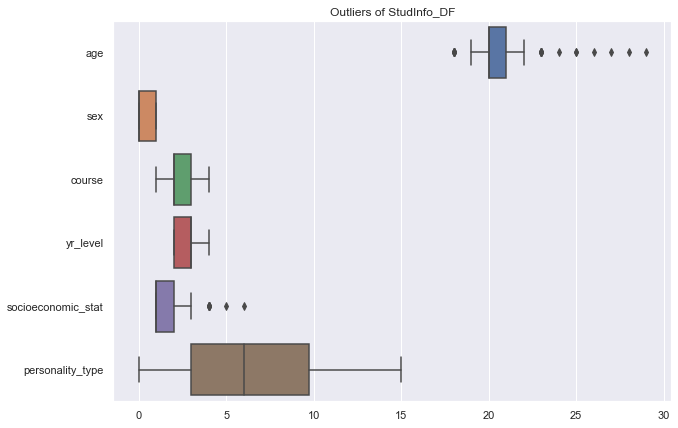

In [44]:
sns.boxplot(data=StudInfo_DF, orient = "h").set(title="Outliers of StudInfo_DF")

[Text(0.5, 1.0, 'Box Plot of GPA')]

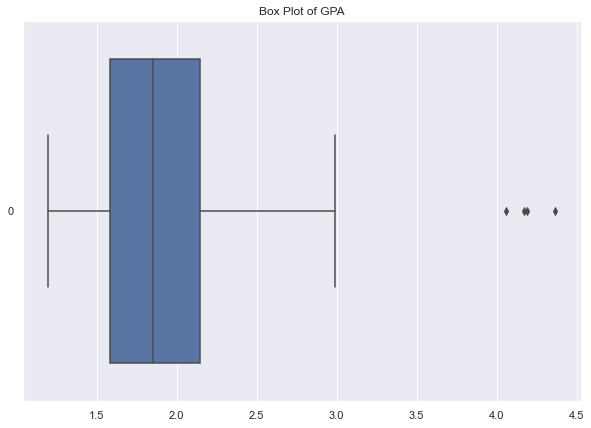

In [45]:
sns.boxplot(data=newDF.iloc[:,48], orient = "h").set(title="Box Plot of GPA")

[Text(0.5, 1.0, 'Box Plot of Tri-Features')]

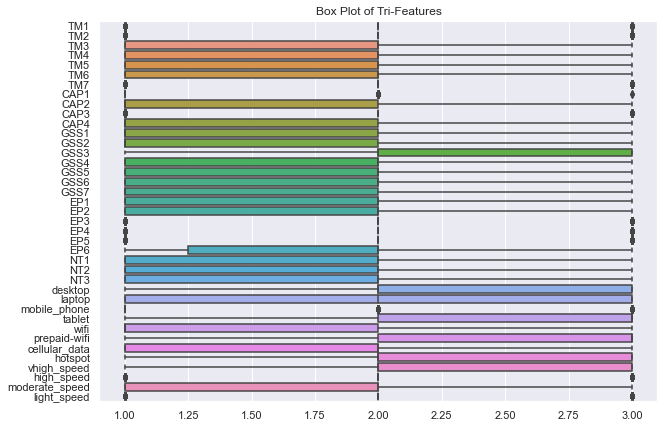

In [46]:
sns.boxplot(data=newDF.iloc[:,9:48], orient = "h").set(title="Box Plot of Tri-Features")

----

value counts for gpa_range :  gpa_range
3            148
2            134
4             48
5              6
6              4
1              2
dtype: int64


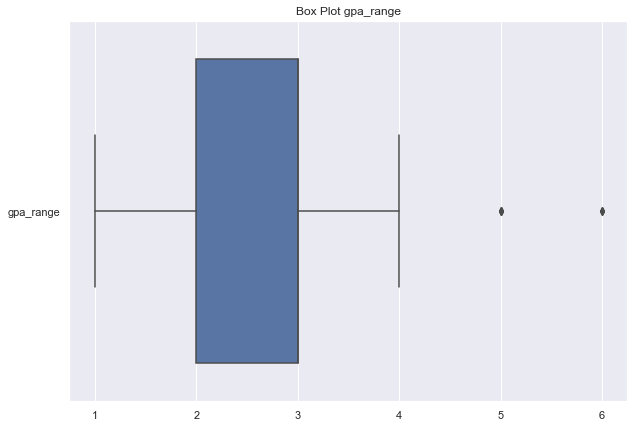

In [47]:
# fig, ax = plt.subplots(figsize=(12,4))
# ax = sns.countplot(newDF["gpa_range"])

sns.boxplot(data=Select_gpa_DF, orient = "h").set(title="Box Plot gpa_range")
print("value counts for gpa_range : ", Select_gpa_DF.value_counts())

[1 = 'Excellent'], 
[2 = 'Superior'], 
[3 = 'Very-Satisfactory'], 
[4 = 'Satisfactory'], 
[5 = 'Fairly-Satisfactory'], 
[6 = 'Barely-Satisfactory'],

gpa_range columns has an outliers these are the 5 and 6, the researhers decided to remain these ff. outliers in order to have a representation for people who belong witht these type of gpa range. 

# Split data to train and test dataset

In [48]:
features=newDF.columns[0:-1].values
features

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'fam_support', 'working_stud', 'scholar',
       'TM1', 'TM2', 'TM3', 'TM4', 'TM5', 'TM6', 'TM7', 'CAP1', 'CAP2',
       'CAP3', 'CAP4', 'GSS1', 'GSS2', 'GSS3', 'GSS4', 'GSS5', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP4', 'EP5', 'EP6', 'NT1', 'NT2',
       'NT3', 'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'prepaid-wifi', 'cellular_data', 'hotspot', 'vhigh_speed',
       'high_speed', 'moderate_speed', 'light_speed', 'GPA'], dtype=object)

In [49]:
target=newDF.columns[-1:].values
target

array(['gpa_range'], dtype=object)

In [50]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(newDF, test_size=0.2, random_state=42)
train.sample(10)

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
198  21.0    0       2         2                   1                 0   
325  21.0    0       4         3                   1                 7   
46   21.0    0       1         3                   3                 3   
162  21.0    1       3         4                   3                 3   
88   22.0    0       3         2                   1                 7   
244  20.0    1       2         3                   1                 1   
21   19.0    0       1         2                   1                11   
73   22.0    0       1         4                   2                14   
257  22.0    1       2         3                   1                 3   
100  19.0    1       3         2                   2                 6   

     fam_support  working_stud  scholar  TM1  ...  wifi  prepaid-wifi  \
198            1             0        0    2  ...     1             3   
325            1             1        0    2  ...     2             3   
46             1             0        0    2  ...     1             3   
162            1             0        0    2  ...     1             3   
88             1             0        0    2  ...     3             3   
244            1             0        0    2  ...     1             1   
21             1             0        0    2  ...     2             1   
73             1             0        0    2  ...     1             1   
257            1             0        0    2  ...     3             1   
100            1             0        0    3  ...     1             2   

     cellular_data  hotspot  vhigh_speed  high_speed  moderate_speed  \
198              2        3            3           1               3   
325              1        2            2           2               1   
46               2        2            3           3               1   
162              2        2            2           2               3   
88               1        1            2           2               2   
244              2        2            2           2               2   
21               2        3            3           2               1   
73               2        2            2           2               2   
257              2        1            1           2               2   
100              1        3            2           2               2   

     light_speed     GPA          gpa_range  
198            3  2.2000  Very-Satisfactory  
325            2  1.5217           Superior  
46             3  1.5192           Superior  
162            2  2.2632       Satisfactory  
88             2  2.0288  Very-Satisfactory  
244            2  1.8214  Very-Satisfactory  
21             2  1.4265           Superior  
73             2  1.6667           Superior  
257            1  2.6429       Satisfactory  
100            1  2.1731  Very-Satisfactory  

[10 rows x 50 columns]

In [51]:
train.head(5)

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
120  21.0    1       3         3                   2                 9   
7    21.0    0       1         2                   1                 5   
144  21.0    1       3         3                   1                 3   
347  19.0    0       4         2                   1                11   
317  20.0    0       4         3                   1                 1   

     fam_support  working_stud  scholar  TM1  ...  wifi  prepaid-wifi  \
120            1             0        0    2  ...     1             3   
7              0             1        0    2  ...     1             2   
144            1             0        0    2  ...     3             3   
347            1             0        0    2  ...     2             1   
317            1             0        0    2  ...     1             3   

     cellular_data  hotspot  vhigh_speed  high_speed  moderate_speed  \
120              2        2            2           2               2   
7                2        2            2           2               2   
144              1        3            3           1               1   
347              2        3            2           2               2   
317              1        3            2           2               1   

     light_speed     GPA     gpa_range  
120            2  1.5341      Superior  
7              2  1.5294      Superior  
144            3  2.6705  Satisfactory  
347            2  1.7353      Superior  
317            2  1.4891      Superior  

[5 rows x 50 columns]

In [52]:
test.head(5)

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
247  20.0    1       2         3                   2                 1   
122  20.0    1       3         3                   1                15   
118  19.0    1       3         2                   1                13   
44   20.0    0       1         3                   1                14   
133  21.0    1       3         3                   2                 4   

     fam_support  working_stud  scholar  TM1  ...  wifi  prepaid-wifi  \
247            1             0        0    2  ...     1             1   
122            1             0        0    2  ...     3             1   
118            1             0        0    1  ...     2             2   
44             1             0        0    2  ...     2             3   
133            1             0        0    2  ...     1             3   

     cellular_data  hotspot  vhigh_speed  high_speed  moderate_speed  \
247              1        2            2           2               1   
122              3        2            3           1               3   
118              1        2            2           2               2   
44               1        2            2           2               1   
133              2        3            3           1               3   

     light_speed     GPA          gpa_range  
247            2  2.3452       Satisfactory  
122            3  1.5795           Superior  
118            2  1.9038  Very-Satisfactory  
44             1  1.7788  Very-Satisfactory  
133            3  1.7614  Very-Satisfactory  

[5 rows x 50 columns]

#### load the data in the variables 

In [53]:
#load the data in the variables 
X_train = train[features]
Y_train = train[target]
X_test = test[features]
Y_test = test[target]

---

# Single-Model Implementation  

RandomForestClassifier() Accuracy Score:  76.81159420289855
DecisionTreeClassifier() Accuracy Score:  92.7536231884058
ExtraTreesClassifier() Accuracy Score:  62.31884057971014
AdaBoostClassifier() Accuracy Score:  75.36231884057972
KNeighborsClassifier() Accuracy Score:  56.52173913043478
MultinomialNB() Accuracy Score:  53.62318840579711


<BarContainer object of 6 artists>

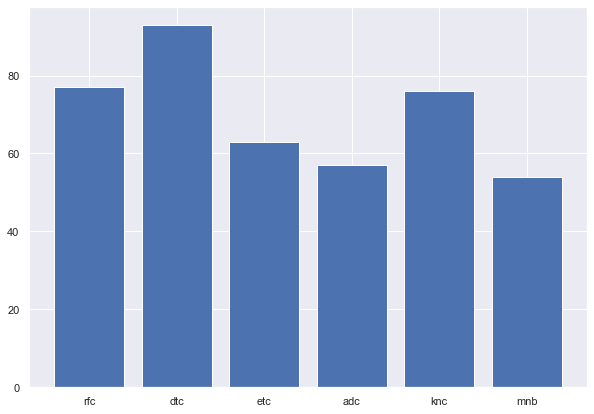

In [54]:
import math
from sklearn.model_selection import cross_val_score
results = []
names = {u"rfc": [], u"dtc": [], u"etc": [], u"adc":[], u"knc":[], u"mnb":[]}
est_single_model = [rfc, dtc, etc, adc, knc, mnb]

for single in est_single_model:
    ypred_single_clf = single.fit(X_train,Y_train).predict(X_test)
    accuracy = accuracy_score(Y_test, ypred_single_clf)*100
    int_acc = math.ceil(accuracy)
    
    #append accuracy inside the the dict
    if single == rfc:
        names["rfc"]=int_acc
    if single == dtc:
        names["dtc"]=int_acc
    if single == etc:
        names["etc"]=int_acc
    if single == knc:
        names["adc"]=int_acc
    if single == adc:
        names["knc"]=int_acc
    if single == mnb:
        names["mnb"]=int_acc

    print("{} Accuracy Score: ".format(single), accuracy)
algo = list(names.keys())
values = list(names.values())

plt.bar(algo, values)

-----

-----

# APPLY SelectKBest for features selection

In [55]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
newX_select = SelectKBest(score_func=chi2, k=37).fit(X_train, Y_train)
f = newX_select.get_support(1)
X_new = X_train[X_train.columns[f]] # final features`

Kbest_features= pd.concat([X_new,df["gpa_range"]],axis=1)
Kbest_features = Kbest_features.dropna(axis=0, inplace=False)
Kbest_features.shape

(273, 38)

In [56]:
Kbest_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 120 to 107
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 273 non-null    float64
 1   sex                 273 non-null    float64
 2   course              273 non-null    float64
 3   yr_level            273 non-null    float64
 4   socioeconomic_stat  273 non-null    float64
 5   personality_type    273 non-null    float64
 6   working_stud        273 non-null    float64
 7   scholar             273 non-null    float64
 8   TM3                 273 non-null    float64
 9   TM4                 273 non-null    float64
 10  TM5                 273 non-null    float64
 11  TM6                 273 non-null    float64
 12  TM7                 273 non-null    float64
 13  CAP2                273 non-null    float64
 14  CAP3                273 non-null    float64
 15  CAP4                273 non-null    float64
 16  GSS2  

In [57]:
features2=Kbest_features.columns[0:-1].values
features2

array(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS2', 'GSS3', 'GSS4',
       'GSS6', 'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3',
       'desktop', 'laptop', 'mobile_phone', 'tablet', 'wifi',
       'cellular_data', 'high_speed', 'light_speed', 'GPA'], dtype=object)

In [58]:
target2= Kbest_features.columns[-1:].values
target2

array(['gpa_range'], dtype=object)

In [59]:
#train_test_split for new features 
train2, test2 =train_test_split(Kbest_features, test_size=0.2, random_state=42)

In [60]:
# Kbest_features load the data in the variables 
X2_train = train2[features2]
Y2_train = train2[target2]
X2_test = test2[features2]
Y2_test = test2[target2]

--------

### Principal component analysis (PCA).

Text(0, 0.5, 'explained_variance_ratio_')

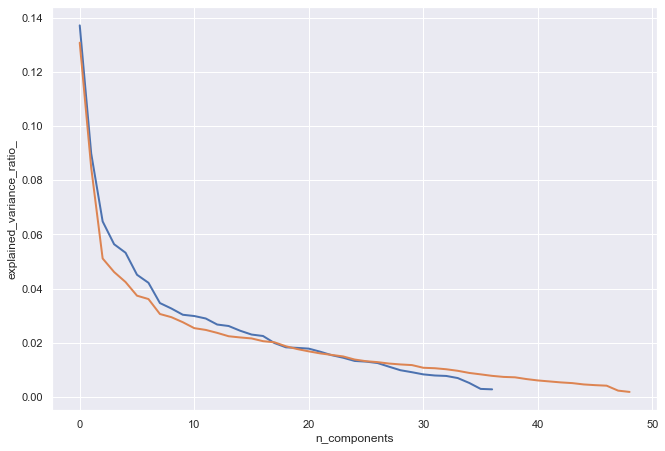

In [61]:
from sklearn.decomposition import PCA

x_train_kb = (X2_train-X2_train.mean())/(X2_train.max()-X2_train.min())

x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())

pca_trainkb = PCA()
pca_trainACTUAL = PCA()

pca_trainkb.fit(x_train_kb)
pca_trainACTUAL.fit(x_train_N)

plt.figure(1, figsize=(12, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_trainkb.explained_variance_ratio_, linewidth=2)
plt.plot(pca_trainACTUAL.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

Amount of variance that each of the chosen components explains, in percentage terms.

# Train and test Boosting model

In [62]:
#create list of classifiers [NEW]
estimatorsNEW = [("RandomForestClassifier", rfc), 
              ("DecisionTreeClassifier", dtc), 
              ("ExtraTreesClassifier", etc), 
              ("AdaBoostClassifier", adc),
              ("KNeighborsClassifier", knc)]

In [63]:
# Apply GradientBoostingClassifier 
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsRestClassifier
kfold = KFold(n_splits=5)

Clf_GradBoost_estNEW = GradientBoostingClassifier(n_estimators=100, max_features='auto', random_state=42)

clf_boosting_ensembleNEW = StackingClassifier(estimators=estimatorsNEW, final_estimator=Clf_GradBoost_estNEW, n_jobs=-1)

OVR_BOOST = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(X2_train, Y2_train)  #One-vs-the-rest (OvR) multiclass strategy.
#PREDICTED Y VALUES FOR BOOSTING ENSEMBLE CLASSIFIERS
clf_boosting_YpredictNEW_1 = OVR_BOOST.predict(X2_test)

#PREDICTED Y VALUES FOR OLD FEATURES ENSEMBLE CLASSIFIERS
BOOSTY_PREDICT = OneVsRestClassifier(clf_boosting_ensembleNEW).fit(X_train, Y_train) 
clf_boosting_YpredictNEW_0 = BOOSTY_PREDICT.predict(X_test)

clf_score = accuracy_score(Y2_test, clf_boosting_YpredictNEW_1)
print("ACCURACY SCORE: [ {:00%} ]".format(clf_score))
print("\n",classification_report(Y2_test, clf_boosting_YpredictNEW_1))

ACCURACY SCORE: [ 89.090909% ]

                    precision    recall  f1-score   support

        Excellent       0.00      0.00      0.00         1
     Satisfactory       1.00      0.50      0.67        10
         Superior       0.96      1.00      0.98        23
Very-Satisfactory       0.81      1.00      0.89        21

         accuracy                           0.89        55
        macro avg       0.69      0.62      0.63        55
     weighted avg       0.89      0.89      0.87        55



In [64]:
clf_boosting_YpredictNEW_1

array(['Superior', 'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Satisfactory', 'Very-Satisfactory', 'Superior', 'Superior',
       'Very-Satisfactory', 'Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior',
       'Very-Satisfactory', 'Very-Satisfactory', 'Satisfactory',
       'Superior', 'Satisfactory', 'Very-Satisfactory', 'Superior',
       'Superior', 'Superior', 'Superior', 'Superior', 'Superior',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Superior', 'Superior',
       'Superior', 'Very-Satisfactory', 'Very-Satisfactory',
       'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Superior', 'Superior',
       'Superior', 'Very-Satisfactory', 'Superior', 'Very-Satisfactory',
       'Very-Satisfactory', 'Very-Satisfactory', 'Satisfactory',
  

#### Confusion Matrix of the 2 set Feature

Text(0.5, 1.0, '49 Features')

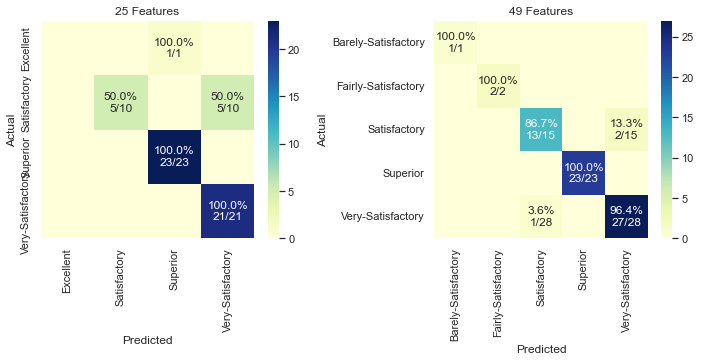

In [65]:
y1_true = Y2_test
cm1 = confusion_matrix(Y2_test, clf_boosting_YpredictNEW_1, labels=np.unique(y1_true))
y0_true = Y_test
cm2 = confusion_matrix(Y_test, clf_boosting_YpredictNEW_0, labels=np.unique(y0_true))

#BOOSTING WITH 25 FEATURES
cm_sum_1 = np.sum(cm1, axis=1, keepdims=True)
cm_perc_1= cm1 / cm_sum_1.astype(float) * 100
annot1 = np.empty_like(cm1).astype(str)
nrows, ncols = cm1.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm1[i, j]
        p = cm_perc_1[i, j]
        if c == 0:
            annot1[i, j] = ''
        else:
            s = cm_sum_1[i]
            annot1[i, j] = '%.1f%%\n%d/%d' % (p, c, s)

#BOOSTING WITH 49 FEATURES
cm_sum_2 = np.sum(cm2, axis=1, keepdims=True)
cm_perc_2= cm2 / cm_sum_2.astype(float) * 100
annot2 = np.empty_like(cm2).astype(str)
nrows, ncols = cm2.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm2[i, j]
        p = cm_perc_2[i, j]
        if c == 0:
            annot2[i, j] = ''
        else:
            s = cm_sum_2[i]
            annot2[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            
cm1 = pd.DataFrame(cm1, index=np.unique(y1_true), columns=np.unique(y1_true))
cm1.index.name = 'Actual'
cm1.columns.name = 'Predicted'
cm2 = pd.DataFrame(cm2, index=np.unique(y0_true), columns=np.unique(y0_true))
cm2.index.name = 'Actual'
cm2.columns.name = 'Predicted'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(cm1, cmap="YlGnBu", annot=annot1, fmt='', ax=ax[0])
sns.heatmap(cm2, cmap="YlGnBu", annot=annot2, fmt='', ax=ax[1])
plt.tight_layout()
ax[0].set_title("25 Features")
ax[1].set_title("49 Features")

In [66]:
print("USE OLD X AND Y FEATURES : ", cross_val_score(clf_boosting_ensembleNEW, X_train, Y_train).mean())
print("\nAPPLIED K-BEST FEATURES : ", cross_val_score(clf_boosting_ensembleNEW, X2_train, Y2_train).mean())

USE OLD X AND Y FEATURES :  0.894006734006734

APPLIED K-BEST FEATURES :  0.8668076109936574


With the use of features selection specifically SelectKBest and extracts 25 columns and chi-square test measures getting non-negative features. Furthermore, we perform cross validation with 5 folds default, comparing both models the new feature selection perform better with high accuracy.

---

----

# Train and test Bagging model

In [67]:
#Use fit method for all algorithms to be store inside the list. 
rfc_fit = rfc.fit(X2_train, Y2_train)
dtc_fit = dtc.fit(X2_train, Y2_train)
etc_fit = etc.fit(X2_train, Y2_train)
adc_fit = adc.fit(X2_train, Y2_train)
knc_fit = knc.fit(X2_train, Y2_train)
mnb_fit = mnb.fit(X2_train, Y2_train)

estimatorsNEW_fitted = [rfc_fit, dtc_fit, etc_fit, adc_fit,knc_fit] #create list for 'new' ensemble model
#estimatorsOLD_fitted = [rfc_fit, dtc_fit, adc_fit , knc_fit, mnb_fit] #create list for 'old' ensemble model

In [68]:
for clf in estimatorsNEW_fitted:
    clf_regNEW = BaggingClassifier(base_estimator=clf, random_state=42)
    ypred_clfNEW = clf.predict(X2_test) # PREDICT CURRENT CLASSIFIER
    list_estimatorNEW = []
    list_estimatorNEW.append(("clf",clf_regNEW))
    print("[{}] accuracy_score : ".format(clf), accuracy_score(Y2_test, ypred_clfNEW))
    
    # create the ensemble model
    clf_bagging_ensembleNEW = VotingClassifier(list_estimatorNEW, voting="soft")
    OVR_BAGG = OneVsRestClassifier(clf_bagging_ensembleNEW).fit(X2_train, Y2_train)
    ypred_clf_bagging_ensembleNEW = OVR_BAGG.predict(X2_test)

cvbag = cross_val_score(clf_bagging_ensembleNEW, X2_train, Y2_train).mean()
print("\nEnsemble Model Accuracy Score : {:0%}".format(accuracy_score(Y2_test, ypred_clf_bagging_ensembleNEW)))
print("\n",classification_report(Y2_test, ypred_clf_bagging_ensembleNEW))

[RandomForestClassifier()] accuracy_score :  0.8363636363636363
[DecisionTreeClassifier()] accuracy_score :  0.8909090909090909
[ExtraTreesClassifier()] accuracy_score :  0.6909090909090909
[AdaBoostClassifier()] accuracy_score :  0.8181818181818182
[KNeighborsClassifier()] accuracy_score :  0.5272727272727272

Ensemble Model Accuracy Score : 56.363636%

                    precision    recall  f1-score   support

        Excellent       0.00      0.00      0.00         1
     Satisfactory       0.00      0.00      0.00        10
         Superior       0.78      0.61      0.68        23
Very-Satisfactory       0.47      0.81      0.60        21

         accuracy                           0.56        55
        macro avg       0.31      0.35      0.32        55
     weighted avg       0.51      0.56      0.51        55



In [69]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(Y2_test, ypred_clf_bagging_ensembleNEW)

array([[[54,  0],
        [ 1,  0]],

       [[44,  1],
        [10,  0]],

       [[28,  4],
        [ 9, 14]],

       [[15, 19],
        [ 4, 17]]], dtype=int64)

In [70]:
print("USE OLD X AND Y FEATURES : ", cross_val_score(clf_bagging_ensembleNEW, X_train, Y_train).mean())
print("\nAPPLIED K-BEST FEATURES : ", cross_val_score(clf_bagging_ensembleNEW, X2_train, Y2_train).mean())

USE OLD X AND Y FEATURES :  0.5423569023569023

APPLIED K-BEST FEATURES :  0.5549682875264271


In [71]:
# predictions
pred1 = OVR_BAGG.predict(X2_test)
pred2 = rfc.predict(X2_test)
pred3 = dtc.predict(X2_test)
pred4 = etc.predict(X2_test)
pred5 = knc.predict(X2_test)
pred6 = OVR_BOOST.predict(X2_test)

### Plot individual result of predict (single model, bagging and boosting)

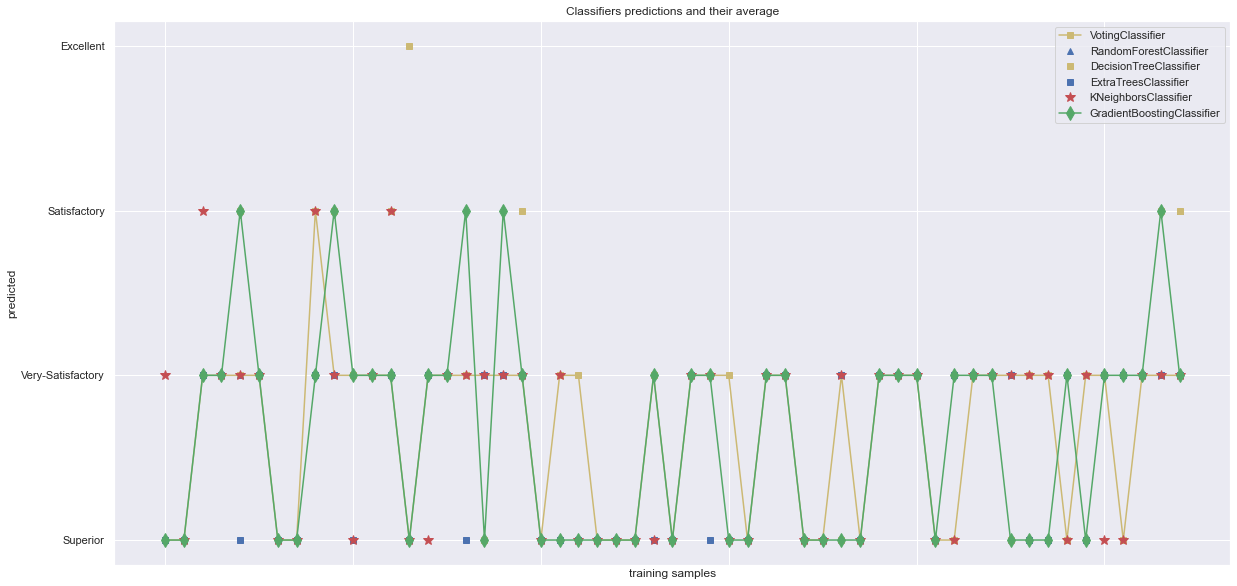

In [72]:
plt.figure(figsize=(20,10))
plt.plot(pred1, "-ys", label="VotingClassifier")
plt.plot(pred2, "b^", label="RandomForestClassifier")
plt.plot(pred3, "ys", label="DecisionTreeClassifier")
plt.plot(pred4, "s", label="ExtraTreesClassifier")
plt.plot(pred5, "r*", ms=10, label="KNeighborsClassifier")
plt.plot(pred6, "-gd", ms=10, label="GradientBoostingClassifier")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Classifiers predictions and their average")

plt.show()

---

### Bias-variance decomposition

In [73]:
# tempdf= Kbest_features
# tempdf = pd.concat([X_new, Select_gpa_DF], axis=1)
# tempdf = tempdf.dropna(axis=0, inplace=False)

# features3 =tempdf.columns[0:-1].values
# target3 =tempdf.columns[-1:].values
# print("Features : ",features3)
# print("\nTarget : ",target3)

In [74]:
# #train_test_split for new features 
# entrain, entest =train_test_split(tempdf, test_size=0.2, random_state=42)

# # Kbest_features load the data in the variables [encoded gpa_range]
# X3_train = entrain[features3]
# Y3_train = entrain[target3]
# X3_test = entest[features3]
# Y3_test = entest[target3]

In [75]:
# avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
#         clf_boosting_ensembleNEW, X3_train.values, Y3_train.values, X3_test.values, Y3_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print('Average expected loss: %.3f' % avg_expected_loss)
# print('Average bias: %.3f' % avg_bias)
# print('Average variance: %.3f' % avg_var)

In [76]:
# avg_expected_loss2, avg_bias2, avg_var2 = bias_variance_decomp(
#         clf_bagging_ensembleNEW, X3_train.values, Y3_train.values, X3_test.values, Y3_test.values, 
#         loss='0-1_loss',
#         random_seed=123)
# print('Average expected loss: %.3f' % avg_expected_loss2)
# print('Average bias: %.3f' % avg_bias2)
# print('Average variance: %.3f' % avg_var2)

---

# PLOT LEARNING CURVES 

In [77]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import learning_curve
# def plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title,
#     X2_train,
#     Y2_test,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     scoring=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
#    ):
    
#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")
    
#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         clf_boosting_ensembleNEW,
#         X2_train,
#         Y2_test,
#         scoring=scoring,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
    
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)
    
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes[0].fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes[0].plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes[0].plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes[0].legend(loc="best")
    
#      # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, "o-")
#     axes[1].fill_between(
#         train_sizes,
#         fit_times_mean - fit_times_std,
#         fit_times_mean + fit_times_std,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[2].grid()
#     axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[2].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

# fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# title1 = "Learning Curves (Ensemble Boosting)"
# cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
# plot_learning_curve(
#     clf_boosting_ensembleNEW,
#     title1,
#     X2_train,
#     Y2_train,
#     axes=axes[:, 0],
#     ylim=(0.7, 1.01),
#     cv=cv,
#     n_jobs=4,
#     scoring="accuracy",
# )

# title2 = "Learning Curves (Ensemble Bagging)"
# cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# plot_learning_curve(
#     clf_bagging_ensembleNEW, title2, X2_train, Y2_train, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
# )


# plt.show()

---

## Deploy trained model

In [78]:
import pickle

In [79]:
pickle.dump(OVR_BOOST, open('thesis_Model.pkl','wb'))

In [80]:
test_model = pickle.load(open('thesis_Model.pkl','rb'))

In [91]:
new_Xdata = X2_test.sample(50)
new_Ydata = Y2_test['gpa_range'].loc[new_Xdata.index.values]
print(new_Xdata)

           age  sex  course  yr_level  socioeconomic_stat  personality_type  \
210  18.000000  1.0     2.0       2.0                 1.0               6.0   
235  20.000000  1.0     2.0       3.0                 1.0               3.0   
71   21.000000  0.0     1.0       4.0                 1.0               6.0   
244  20.000000  1.0     2.0       3.0                 1.0               1.0   
252  20.000000  0.0     2.0       3.0                 1.0               0.0   
262  21.000000  1.0     2.0       3.0                 2.0               6.0   
223  19.000000  1.0     2.0       2.0                 2.0               4.0   
325  21.000000  0.0     4.0       3.0                 1.0               7.0   
275  20.000000  1.0     2.0       3.0                 1.0               0.0   
281  21.000000  1.0     2.0       3.0                 3.0               6.0   
214  19.000000  0.0     2.0       2.0                 1.0               0.0   
160  23.000000  1.0     3.0       4.0               

In [92]:
print(new_Ydata)

210             Superior
235    Very-Satisfactory
71     Very-Satisfactory
244    Very-Satisfactory
252         Satisfactory
262         Satisfactory
223             Superior
325             Superior
275         Satisfactory
281    Very-Satisfactory
214             Superior
160         Satisfactory
69     Very-Satisfactory
287         Satisfactory
324             Superior
81              Superior
229             Superior
116             Superior
78     Very-Satisfactory
192            Excellent
150         Satisfactory
320             Superior
352    Very-Satisfactory
173    Very-Satisfactory
340             Superior
273    Very-Satisfactory
127         Satisfactory
101             Superior
85              Superior
260    Very-Satisfactory
292    Very-Satisfactory
280    Very-Satisfactory
53              Superior
161    Very-Satisfactory
200             Superior
209         Satisfactory
272             Superior
204             Superior
224             Superior
6               Superior


In [83]:
new_Xdata.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS2', 'GSS3', 'GSS4', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'GPA'],
      dtype='object')

In [84]:
new_Ydata

249    Very-Satisfactory
223             Superior
272             Superior
36     Very-Satisfactory
352    Very-Satisfactory
309             Superior
96              Superior
173    Very-Satisfactory
192            Excellent
155         Satisfactory
278    Very-Satisfactory
53              Superior
252         Satisfactory
324             Superior
275         Satisfactory
71     Very-Satisfactory
204             Superior
69     Very-Satisfactory
127         Satisfactory
78     Very-Satisfactory
292    Very-Satisfactory
325             Superior
229             Superior
267    Very-Satisfactory
156    Very-Satisfactory
244    Very-Satisfactory
116             Superior
150         Satisfactory
160         Satisfactory
85              Superior
Name: gpa_range, dtype: object

In [85]:
new_Xdata

age  sex  course  yr_level  socioeconomic_stat  personality_type  \
249  20.0  0.0     2.0       3.0                 1.0               0.0   
223  19.0  1.0     2.0       2.0                 2.0               4.0   
272  20.0  1.0     2.0       3.0                 1.0               0.0   
36   21.0  0.0     1.0       3.0                 1.0               5.0   
352  21.0  0.0     4.0       2.0                 2.0               6.0   
309  21.0  1.0     4.0       3.0                 1.0               3.0   
96   19.0  1.0     3.0       2.0                 1.0               4.0   
173  20.0  1.0     3.0       4.0                 1.0              14.0   
192  19.0  1.0     2.0       2.0                 3.0               7.0   
155  21.0  0.0     3.0       4.0                 1.0               4.0   
278  20.0  1.0     2.0       3.0                 1.0               9.0   
53   20.0  0.0     1.0       3.0                 1.0               1.0   
252  20.0  0.0     2.0       3.0                 1.0               0.0   
324  21.0  0.0     4.0       3.0                 1.0               4.0   
275  20.0  1.0     2.0       3.0                 1.0               0.0   
71   21.0  0.0     1.0       4.0                 1.0               6.0   
204  19.0  1.0     2.0       2.0                 3.0               4.0   
69   20.0  0.0     1.0       3.0                 1.0               1.0   
127  21.0  1.0     3.0       3.0                 1.0               7.0   
78   22.0  1.0     3.0       2.0                 1.0               2.0   
292  21.0  1.0     2.0       4.0                 2.0              13.0   
325  21.0  0.0     4.0       3.0                 1.0               7.0   
229  19.0  1.0     2.0       2.0                 3.0              10.0   
267  20.0  1.0     2.0       3.0                 1.0              15.0   
156  21.0  1.0     3.0       4.0                 1.0               4.0   
244  20.0  1.0     2.0       3.0                 1.0               1.0   
116  19.0  0.0     3.0       2.0                 1.0              10.0   
150  22.0  0.0     3.0       4.0                 1.0               3.0   
160  23.0  1.0     3.0       4.0                 1.0               7.0   
85   22.0  1.0     3.0       2.0                 1.0               3.0   

     working_stud  scholar  TM3  TM4  ...  NT3  desktop  laptop  mobile_phone  \
249           0.0      0.0  1.0  1.0  ...  2.0      1.0     1.0           1.0   
223           0.0      0.0  1.0  2.0  ...  2.0      1.0     1.0           1.0   
272           0.0      0.0  1.0  3.0  ...  2.0      1.0     2.0           3.0   
36            0.0      0.0  2.0  2.0  ...  2.0      1.0     1.0           1.0   
352           0.0      0.0  1.0  2.0  ...  2.0      3.0     1.0           2.0   
309           1.0      0.0  2.0  1.0  ...  2.0      3.0     2.0           1.0   
96            0.0      0.0  1.0  2.0  ...  1.0      2.0     2.0           1.0   
173           0.0      0.0  2.0  2.0  ...  2.0      2.0     3.0           1.0   
192           0.0      0.0  2.0  1.0  ...  2.0      1.0     3.0           1.0   
155           0.0      0.0  1.0  3.0  ...  2.0      3.0     2.0           1.0   
278           0.0      0.0  2.0  2.0  ...  2.0      1.0     1.0           1.0   
53            1.0      0.0  2.0  2.0  ...  2.0      2.0     2.0           2.0   
252           0.0      0.0  2.0  2.0  ...  2.0      3.0     2.0           1.0   
324           0.0      0.0  1.0  2.0  ...  2.0      3.0     2.0           1.0   
275           0.0      0.0  1.0  2.0  ...  2.0      1.0     3.0           2.0   
71            0.0      0.0  1.0  2.0  ...  1.0      3.0     3.0           1.0   
204           0.0      0.0  1.0  1.0  ...  1.0      2.0     1.0           1.0   
69            0.0      0.0  2.0  3.0  ...  3.0      3.0     2.0           1.0   
127           1.0      0.0  1.0  2.0  ...  2.0      1.0     3.0           2.0   
78            0.0      0.0  2.0  2.0  ...  2.0      3.0     3.0           1.0   
292       

In [86]:
new_Xdata.columns

Index(['age', 'sex', 'course', 'yr_level', 'socioeconomic_stat',
       'personality_type', 'working_stud', 'scholar', 'TM3', 'TM4', 'TM5',
       'TM6', 'TM7', 'CAP2', 'CAP3', 'CAP4', 'GSS2', 'GSS3', 'GSS4', 'GSS6',
       'GSS7', 'EP1', 'EP2', 'EP3', 'EP5', 'NT1', 'NT2', 'NT3', 'desktop',
       'laptop', 'mobile_phone', 'tablet', 'wifi', 'cellular_data',
       'high_speed', 'light_speed', 'GPA'],
      dtype='object')

In [87]:
#predictions by the model
pred = test_model.predict(new_Xdata)
print(pred)

['Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory'
 'Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory' 'Superior'
 'Very-Satisfactory' 'Very-Satisfactory' 'Superior' 'Satisfactory'
 'Superior' 'Very-Satisfactory' 'Very-Satisfactory' 'Superior'
 'Very-Satisfactory' 'Very-Satisfactory' 'Very-Satisfactory'
 'Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory'
 'Very-Satisfactory' 'Very-Satisfactory' 'Superior' 'Very-Satisfactory'
 'Very-Satisfactory' 'Superior']


In [88]:
print(new_Ydata.values)

['Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory'
 'Very-Satisfactory' 'Superior' 'Superior' 'Very-Satisfactory' 'Excellent'
 'Satisfactory' 'Very-Satisfactory' 'Superior' 'Satisfactory' 'Superior'
 'Satisfactory' 'Very-Satisfactory' 'Superior' 'Very-Satisfactory'
 'Satisfactory' 'Very-Satisfactory' 'Very-Satisfactory' 'Superior'
 'Superior' 'Very-Satisfactory' 'Very-Satisfactory' 'Very-Satisfactory'
 'Superior' 'Satisfactory' 'Satisfactory' 'Superior']


In [89]:
#checking for the accuracy score using confusion matrix
res_cm = confusion_matrix (new_Ydata, pred)
print('Confusion Matrix:\n', res_cm)
res_acc = accuracy_score(new_Ydata, pred)
print('Accuracy Score:\n', res_acc)

Confusion Matrix:
 [[ 0  0  1  0]
 [ 0  1  0  5]
 [ 0  0 11  0]
 [ 0  0  0 12]]
Accuracy Score:
 0.8


In [90]:
print(classification_report(new_Ydata, pred))

                   precision    recall  f1-score   support

        Excellent       0.00      0.00      0.00         1
     Satisfactory       1.00      0.17      0.29         6
         Superior       0.92      1.00      0.96        11
Very-Satisfactory       0.71      1.00      0.83        12

         accuracy                           0.80        30
        macro avg       0.66      0.54      0.52        30
     weighted avg       0.82      0.80      0.74        30

